In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pickle
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


import datetime as dt
import warnings
from sklearn.exceptions import ConvergenceWarning
import warnings



from sklearn.ensemble import RandomForestRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def outlier_thresholds(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.05)
    quartile3 = dataframe[col_name].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit






def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if low_limit > 0:
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    else:
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit




def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


def stalk(dataframe, var, target="SalePrice"):
    print("{}  | type: {}\n".format(var, dataframe[var].dtype))
    print(pd.DataFrame({"n": dataframe[var].value_counts(),
                        "Ratio": 100 * dataframe[var].value_counts() / len(dataframe),
                        "TARGET_MEDIAN": dataframe.groupby(var)[target].median(),
                        "Target_MEAN": dataframe.groupby(var)[target].mean()}), end="\n\n\n")

    plt.figure(figsize=(10, 5))
    chart = sns.countplot(
        data=df,
        x=df[var])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show();


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

train = pd.read_csv(r"E:\9. HAFTA\train.csv")
test = pd.read_csv(r"E:\9. HAFTA\test.csv")
df = train.append(test).reset_index(drop=True)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [4]:
corr_matrix = df.corr()
print(corr_matrix["SalePrice"].sort_values(ascending=False))
plt.show()

SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
GarageYrBlt      0.486
MasVnrArea       0.477
Fireplaces       0.467
BsmtFinSF1       0.386
LotFrontage      0.352
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
Id              -0.022
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
MSSubClass      -0.084
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64


In [5]:

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    grab_col_names for given dataframe

    :param dataframe:
    :param cat_th:
    :param car_th:
    :return:
    """


    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols, num_but_cat


cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df, car_th=10)


Observations: 2919
Variables: 81
cat_cols: 50
num_cols: 28
cat_but_car: 3
num_but_cat: 10


In [6]:

# Fill NA values


def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

    
missing_values_table(df)

              n_miss  ratio
PoolQC          2909 99.660
MiscFeature     2814 96.400
Alley           2721 93.220
Fence           2348 80.440
SalePrice       1459 49.980
FireplaceQu     1420 48.650
LotFrontage      486 16.650
GarageYrBlt      159  5.450
GarageFinish     159  5.450
GarageQual       159  5.450
GarageCond       159  5.450
GarageType       157  5.380
BsmtCond          82  2.810
BsmtExposure      82  2.810
BsmtQual          81  2.770
BsmtFinType2      80  2.740
BsmtFinType1      79  2.710
MasVnrType        24  0.820
MasVnrArea        23  0.790
MSZoning           4  0.140
BsmtFullBath       2  0.070
BsmtHalfBath       2  0.070
Functional         2  0.070
Utilities          2  0.070
BsmtFinSF2         1  0.030
BsmtUnfSF          1  0.030
BsmtFinSF1         1  0.030
TotalBsmtSF        1  0.030
SaleType           1  0.030
KitchenQual        1  0.030
Exterior2nd        1  0.030
Exterior1st        1  0.030
GarageCars         1  0.030
GarageArea         1  0.030
Electrical         1

In [7]:

drop_list = ["PoolQC", "MiscFeature", "Alley", "Fence", "Utilities"]
df.drop(drop_list, inplace=True, axis=1)


none_cols = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'FireplaceQu']

zero_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
             'BsmtFullBath','BsmtHalfBath', 'GarageYrBlt', 'GarageArea',
             'GarageCars', 'MasVnrArea']

freq_cols = ['Exterior1st', 'Exterior2nd', 'KitchenQual', 
             'Electrical', 'Functional', 'SaleType']


for col in zero_cols:
    df[col].replace(np.nan, 0, inplace=True)

for col in none_cols:
    df[col].replace(np.nan, "None", inplace=True)

for col in freq_cols:
    df[col].replace(np.nan, df[col].mode()[0], inplace=True)


In [8]:

df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].apply(
    lambda x: x.fillna(x.mode()[0]))
df['LotFrontage'] = df.groupby(['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))


In [9]:
# Outliers
#check_outlier
def outlier_thresholds(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.02)
    quartile3 = dataframe[col_name].quantile(0.98)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))


Id False
MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 True
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
PoolArea True
MiscVal True
MoSold False
SalePrice False


In [10]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


replace_with_thresholds(df, 'SalePrice')



### Fix Types


df["MSSubClass"] = df["MSSubClass"].astype(str)
df["YrSold"] = df["YrSold"].astype(str)
df["MoSold"] = df["MoSold"].astype(str)


In [11]:
# Manuel Feature Engineering

#%%


df["MSZoning"].value_counts()
df.loc[(df["MSZoning"] == "RH"),"MSZoning"] = "RM"

df["LotShape"].value_counts()
df.loc[(df["LotShape"] == "IR2"),"LotShape"] = "IR1"
df.loc[(df["LotShape"] == "IR3"),"LotShape"] = "IR1"

df["LotConfig"].value_counts()
df.loc[(df["LotConfig"] == "Corner"),"LotConfig"] = "FR2"
df.loc[(df["LotConfig"] == "Inside"),"LotConfig"] = "FR2"
df.loc[(df["LotConfig"] == "CulDSac"),"LotConfig"] = "FR3"

df.loc[(df["LandSlope"] == "Mod"),"LandSlope"] = "Sev"
df["LandSlope"].value_counts()


df.loc[(df["Condition1"] == "Feedr"),"Condition1"] = "Artery"
df.loc[(df["Condition1"] == "RRAe"),"Condition1"] = "Artery"
df.loc[(df["Condition1"] == "RRAn"),"Condition1"] = "Norm"
df.loc[(df["Condition1"] == "PosN"),"Condition1"] = "PosA"
df.loc[(df["Condition1"] == "RRNe"), "Condition1"] = "PosA"
df.loc[(df["Condition1"] == "RRNn"), "Condition1"] = "PosA"

df["HouseStyle"].value_counts()
df.loc[(df["HouseStyle"] == "1.5Fin"),"HouseStyle"] = "1.5Unf"
df.loc[(df["HouseStyle"] == "2.5Unf"), "HouseStyle"] = "1.5Unf"
df.loc[(df["HouseStyle"] == "SFoyer"), "HouseStyle"] = "1.5Unf"
df.loc[(df["HouseStyle"] == "SLvl"), "HouseStyle"] = "1Story"
df.loc[(df["HouseStyle"] == "2.5Fin"), "HouseStyle"] = "2Story"


df["MasVnrType"].value_counts()
### kontrol edelim
df.loc[(df["MasVnrType"] == "BrkCmn"), "MasVnrType"] = "None"


df.loc[(df["GarageType"] == "2Types"), "GarageType"] = "Attchd"
df.loc[(df["GarageType"] == "Basment"), "GarageType"] = "Attchd"

df.loc[(df["GarageType"] == "2Types"), "GarageType"] = "Attchd"
df.loc[(df["GarageType"] == "CarPort"), "GarageType"] = "Detchd"




# Derecelendirme içeren değişkenleri ordinal yapıya getirdim.

ext_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['ExterQual'] = df['ExterQual'].map(ext_map).astype('int')

ext_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['ExterCond'] = df['ExterCond'].map(ext_map).astype('int')

bsm_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['BsmtQual'] = df['BsmtQual'].map(bsm_map).astype('int')
df['BsmtCond'] = df['BsmtCond'].map(bsm_map).astype('int')

bsmf_map = {'None': 0,'Unf': 1,'LwQ': 2,'Rec': 3,'BLQ': 4,'ALQ': 5,'GLQ': 6}
df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmf_map).astype('int')
df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmf_map).astype('int')

heat_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['HeatingQC'] = df['HeatingQC'].map(heat_map).astype('int')
df['KitchenQual'] = df['KitchenQual'].map(heat_map).astype('int')
df['GarageCond'] = df['GarageCond'].map(bsm_map).astype('int')
df['GarageQual'] = df['GarageQual'].map(bsm_map).astype('int')

df['LotFrontage'].describe([.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

df.loc[(df['LotFrontage'] < 90), 'NEW_LotFrontage_CAT'] = 'near'
df.loc[(df['LotFrontage'] >= 90), 'NEW_LotFrontage_CAT'] = 'far'


df['BsmtFinType1'].head()

#BsmtUnfSF: Bodrumun bitmemiş alanın metre karesi
#TotalBsmtSF: Bodrum alanının toplam metre karesi
#bodrum toplam alan - bitmemiş alan = bodrum bitmiş alan m2si
df['NEW_BSMTSF'] = df['TotalBsmtSF'] - df['BsmtUnfSF']


#BsmtFinSF1: Tip 1 bitmiş alanın metre karesi

#BsmtFinSF2: Tip 2 bitmiş alanın metre karesi

#toplam bitmiş alanlar m2si
df['NEW_BSMTFINSF'] = df['NEW_BSMTSF'] + df['BsmtFinSF1'] + df['BsmtFinSF2']

#parsel büyüklüğü bitmiş alanlar farkı NEW_AREA_M2
df['NEW_AREA_M2']= df['LotArea'] - df['NEW_BSMTFINSF']

df['NEW_AREA_M2'].describe()


#katların toplam m2si
#1stFlrSF: Birinci Kat metre kare alanı
#2ndFlrSF: İkinci kat metre kare alanı

df['NEW_FLRSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['NEW_FLRSF'].describe()


df['Neighborhood'].value_counts()
df.groupby('Neighborhood').agg({'SalePrice': 'mean'})
neigh_map = {'MeadowV': "1bir", 'IDOTRR': 1, 'BrDale': 1, 'BrkSide': 2, 'OldTown': 2, 'Edwards': 2,
                 'Sawyer': 3, 'Blueste': 3, 'SWISU': 3, 'NPkVill': 3, 'NAmes': 3, 'Mitchel': 4,
                 'SawyerW': 5, 'NWAmes': 5, 'Gilbert': 5, 'Blmngtn': 5, 'CollgCr': 5,
                 'ClearCr': 6, 'Crawfor': 6, 'Veenker': 7, 'Somerst': 7, 'Timber': 8,
                 'StoneBr': 9, 'NridgHt': 10, 'NoRidge': 10}

df['Neighborhood'] = df['Neighborhood'].map(neigh_map)


#orjinal yapım ve yeniden düzenlenme tarihi arasındaki fark
#YearBuilt: Orijinal yapım tarihi
#YearRemodAdd: Yeniden düzenleme tarihi

df['NEW_YEAR_REMOBLT'] = df['YearRemodAdd'] - df['YearBuilt']
df['YearRemodAdd'].head()



#kaç yıl önce satılmış değişkeni oluşturduk

#önce satıldığı yıl ve ay değişkenlerini birleştireceğiz

df['MoSold'].head()

df['MoSold'].head()
df['YrSold'].head()


df['NEW_SOLD_DATE'] = df['MoSold'] + ' ' + df['YrSold']

df['NEW_SOLD_DATE'].head()
#object olan tipi tarih formatına getirdik. satıldığı günü bilmediğimiz için hepsine 1 dedik gün olarak

df['NEW_SOLD_DATE'] = pd.to_datetime(df['NEW_SOLD_DATE']).dt.date

#şimdi son satılan evi bugünün tarihi olarak alıp kaç gün önce satıldığını hesaplayacağız

df['NEW_SOLD_DATE'].max()   #datetime.date(2010, 7, 1)

###########################
today_date = dt.date(2010, 7, 1)

#new sold days olarak yeni bir değişken türettik, bu değişken bugünün tarihiyle satılma tarihi arasındaki
# farkı temsil ediyor.
df['NEW_SOLD_DAYS'] = df.groupby('Id').agg({'NEW_SOLD_DATE': lambda date: (today_date - date.max()).days})

df['NEW_SOLD_DAYS'].isnull().any() #true

df['NEW_SOLD_DAYS'].describe()

df['NEW_SOLD_DAYS'] = df['NEW_SOLD_DAYS'].fillna(0)

#new sold date değişkenini silebiliriz.

del df['NEW_SOLD_DATE']


df['GarageCars'].describe()

df.loc[(df['GarageCars'] <1), 'NEW_GarageCars_CAT'] = 'no_car'
df.loc[(df['GarageCars'] >= 1) & (df['GarageCars'] < 3), 'NEW_GarageCars_CAT'] = 'one_two_car'
df.loc[(df['GarageCars'] >= 3), 'NEW_GarageCars_CAT'] = 'more_car'

df['NEW_GarageCars_CAT'].head()



df.loc[(df["Condition2"] == "Artery"),"Condition2"] = "Feedr"
df.loc[(df["Condition2"] == "RRAe"),"Condition2"] = "Feedr"
df.loc[(df["Condition2"] == "RRAn"),"Condition2"] = "Feedr"
df.loc[(df["Condition2"] == "PosN"),"Condition2"] = "Feedr"
df.loc[(df["Condition2"] == "RRNn"), "Condition2"] = "Feedr"
df.loc[(df["Condition2"] == "PosA"), "Condition2"] = "Feedr"


df['RoofStyle'].value_counts()
df.loc[(df["RoofStyle"] == "Flat"),"RoofStyle"] = "Gambrel"
df.loc[(df["RoofStyle"] == "Mansard"),"RoofStyle"] = "Gambrel"
df.loc[(df["RoofStyle"] == "Shed"),"RoofStyle"] = "Gambrel"


df['RoofMatl'].value_counts()
df.loc[(df["RoofMatl"] == "WdShake"),"RoofMatl"] = "Tar&Grv"
df.loc[(df["RoofMatl"] == "WdShngl"),"RoofMatl"] = "Tar&Grv"
df.loc[(df["RoofMatl"] == "Metal"),"RoofMatl"] = "Tar&Grv"
df.loc[(df["RoofMatl"] == "Roll"),"RoofMatl"] = "Tar&Grv"
df.loc[(df["RoofMatl"] == "ClyTile"), "RoofMatl"] = "Tar&Grv"
df.loc[(df["RoofMatl"] == "Membran"), "RoofMatl"] = "Tar&Grv"


df['Heating'].value_counts()
df.loc[(df["Heating"] == "Grav"),"Heating"] = "GasW"
df.loc[(df["Heating"] == "Wall"),"Heating"] = "GasW"
df.loc[(df["Heating"] == "OthW"),"Heating"] = "GasW"
df.loc[(df["Heating"] == "Floor"),"Heating"] = "GasW"


df['Electrical'].value_counts()
df.loc[(df["Electrical"] == "FuseP"),"Electrical"] = "FuseF"
df.loc[(df["Electrical"] == "Mix"),"Electrical"] = "FuseF"


df['Functional'].value_counts()
df.loc[(df["Functional"] == "Maj2"),"Functional"] = "Maj1"
df.loc[(df["Functional"] == "Sev"),"Functional"] = "Maj1"


In [12]:
def rare_analyser(dataframe, target, rare_perc):
    rare_columns = [col for col in dataframe.columns if len(dataframe[col].value_counts()) <= 20
                    and (dataframe[col].value_counts() / len(dataframe) < rare_perc).any(axis=None)]
    for var in rare_columns:
        print(var, ":", len(dataframe[var].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[var].value_counts(),
                            "RATIO": dataframe[var].value_counts() / len(dataframe),
                            "TARGET_MEDIAN": dataframe.groupby(var)[target].median()}), end="\n\n\n")


rare_analyser(df, "SalePrice", 0.01)

MSSubClass : 16
     COUNT  RATIO  TARGET_MEDIAN
120    182  0.062     192000.000
150      1  0.000            nan
160    128  0.044     146000.000
180     17  0.006      88500.000
190     61  0.021     128250.000
20    1079  0.370     159250.000
30     139  0.048      99900.000
40       6  0.002     142500.000
45      18  0.006     107500.000
50     287  0.098     132000.000
60     575  0.197     215200.000
70     128  0.044     156000.000
75      23  0.008     163500.000
80     118  0.040     166500.000
85      48  0.016     140750.000
90     109  0.037     135980.000


MSZoning : 4
         COUNT  RATIO  TARGET_MEDIAN
C (all)     25  0.009      74700.000
FV         139  0.048     205950.000
RL        2267  0.777     174000.000
RM         488  0.167     122000.000


Street : 2
      COUNT  RATIO  TARGET_MEDIAN
Grvl     12  0.004     114250.000
Pave   2907  0.996     163000.000


OverallQual : 10
    COUNT  RATIO  TARGET_MEDIAN
1       4  0.001      50150.000
2      13  0.004      600

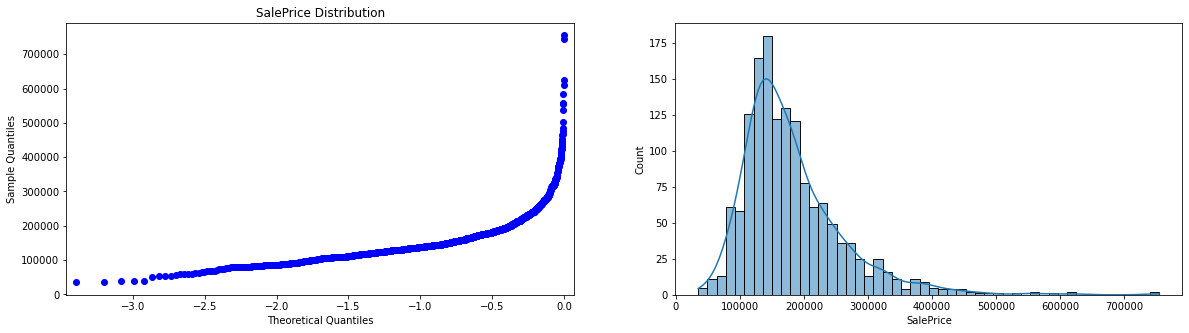

In [13]:
# bağımlı değişken dönüşümü



df['SalePrice'].describe().T
# qq graf ve dağılım graf
import statsmodels.api as sm
fig, (ax, ax2) = plt.subplots(ncols=2,figsize=(20, 5))

sm.qqplot(df.SalePrice, line = 's', ax = ax)
ax.set_title("QQ-Plot")


sns.histplot(df.SalePrice, bins=50, kde=True, ax=ax2);
ax.set_title("SalePrice Distribution")

plt.show()

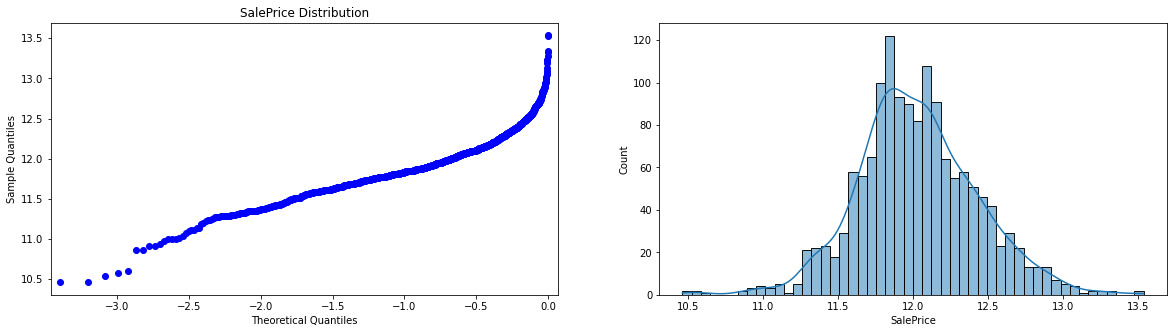

In [14]:
# log dönüşümü SalePrice üzerinde


df["SalePrice"] = np.log1p(df["SalePrice"])

# qq graf ve dağılım graf
import statsmodels.api as sm
fig, (ax, ax2) = plt.subplots(ncols=2,figsize=(20, 5))

sm.qqplot(df.SalePrice, line = 's', ax = ax)
ax.set_title("QQ-Plot")


sns.histplot(df.SalePrice, bins=50, kde=True, ax=ax2);
ax.set_title("SalePrice Distribution")

plt.show()


In [15]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
numeric_cols = df.dtypes[df.dtypes != "object"].index   
# Check the skew of all numerical features
skewed_cols = df[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_cols})
skewness.head(10)


,Skew
MiscVal,21.947
PoolArea,16.898
NEW_AREA_M2,13.025
LotArea,12.822
LowQualFinSF,12.089
3SsnPorch,11.376
KitchenAbvGr,4.302
BsmtFinSF2,4.146
EnclosedPorch,4.004
ScreenPorch,3.947


In [16]:
skewness = skewness[abs(skewness['Skew']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
print(skewness) 
    

There are 34 skewed numerical features to Box Cox transform
                   Skew
MiscVal          21.947
PoolArea         16.898
NEW_AREA_M2      13.025
LotArea          12.822
LowQualFinSF     12.089
3SsnPorch        11.376
KitchenAbvGr      4.302
BsmtFinSF2        4.146
EnclosedPorch     4.004
ScreenPorch       3.947
BsmtHalfBath      3.932
BsmtFinType2      3.152
MasVnrArea        2.614
OpenPorchSF       2.535
NEW_YEAR_REMOBLT  2.064
WoodDeckSF        1.842
LotFrontage       1.506
1stFlrSF          1.470
BsmtFinSF1        1.425
ExterCond         1.316
GrLivArea         1.269
NEW_FLRSF         1.252
NEW_BSMTSF        1.179
NEW_BSMTFINSF     1.179
TotalBsmtSF       1.157
BsmtUnfSF         0.919
2ndFlrSF          0.862
ExterQual         0.786
TotRmsAbvGrd      0.758
BsmtQual         -1.269
GarageQual       -3.264
GarageCond       -3.383
BsmtCond         -3.604
GarageYrBlt      -3.906


In [17]:
from scipy.special import boxcox1p  
skewed_cols = skewness.index
print(skewed_cols) 
lam = 0.15
for cols in skewed_cols:
    df[cols] = boxcox1p(df[cols], lam)


Index(['MiscVal', 'PoolArea', 'NEW_AREA_M2', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'BsmtFinType2', 'MasVnrArea',
       'OpenPorchSF', 'NEW_YEAR_REMOBLT', 'WoodDeckSF', 'LotFrontage',
       '1stFlrSF', 'BsmtFinSF1', 'ExterCond', 'GrLivArea', 'NEW_FLRSF',
       'NEW_BSMTSF', 'NEW_BSMTFINSF', 'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF',
       'ExterQual', 'TotRmsAbvGrd', 'BsmtQual', 'GarageQual', 'GarageCond',
       'BsmtCond', 'GarageYrBlt'],
      dtype='object')


In [18]:
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df, cat_th=10, car_th=20)

cat_cols = cat_cols + cat_but_car
df = one_hot_encoder(df, cat_cols, drop_first=True)


Observations: 2919
Variables: 84
cat_cols: 52
num_cols: 32
cat_but_car: 0
num_but_cat: 19


In [19]:
# Dropping target value
y = df['SalePrice']
y.dropna(inplace=True)
df.drop(columns='SalePrice', inplace=True)



train = df.iloc[:len(y), :]
test = df.iloc[len(train):, :]


In [20]:
X = train
X_test = test

In [21]:
# Blended Model

#%%

from datetime import datetime
from sklearn.model_selection import KFold, cross_val_score



print('START ML', datetime.now(), )

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)


# rmsle
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


# build our model scoring function
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return (rmse)


START ML 2021-06-24 11:12:54.137558


In [22]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV 
from mlxtend.regressor import StackingCVRegressor


# setup models    
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kfolds,))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=alphas2,
                              random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas,
                                        cv=kfolds, random_state=42, l1_ratio=e_l1ratio))
                                        
svr = make_pipeline(RobustScaler(),
                      SVR(C= 20, epsilon= 0.008, gamma=0.0003,))
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)
                                   

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       #min_data_in_leaf=2,
                                       #min_sum_hessian_in_leaf=11
                                       )
                                       
# changed objective from reg:linear to reg:squarederror
xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006, random_state=42)

# stack
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,
                                            gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)


In [24]:

print('TEST score on CV')

score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )


TEST score on CV
Kernel Ridge score: 0.1288 (0.0258)
 2021-06-24 11:13:32.158201
Lasso score: 0.1285 (0.0257)
 2021-06-24 11:14:51.231517
ElasticNet score: 0.1281 (0.0256)
 2021-06-24 11:19:27.729235
SVR score: 0.1278 (0.0318)
 2021-06-24 11:19:42.359297
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is se

In [25]:

print('START Fit')
print(datetime.now(), 'StackingCVRegressor')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))
print(datetime.now(), 'elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)
print(datetime.now(), 'lasso')
lasso_model_full_data = lasso.fit(X, y)
print(datetime.now(), 'ridge')
ridge_model_full_data = ridge.fit(X, y)
print(datetime.now(), 'svr')
svr_model_full_data = svr.fit(X, y)
print(datetime.now(), 'GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)
print(datetime.now(), 'xgboost')
xgb_model_full_data = xgboost.fit(X, y)
print(datetime.now(), 'lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
2021-06-24 11:30:33.188570 StackingCVRegressor
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7

In [26]:

def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))
            
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.07147254912038623
